In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm , t

## Generating normally distributed sample data

norm.rvs() has keyword parameters
- location parameter (center of the distribution, population mean)
- scale parameter (width of the distribution, population standard deviation)


```
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
```



We use here an example motivated by the Albany April daily mean temp climatology (unit5):

- mean=47.7 F
- stddev=8.7 F

In [50]:
n=30*10# 30 days * 10 years
m=47.7
s=8.7
x=norm.rvs(loc=m,scale=s,size=n)
ypos=np.zeros(n)

print(f"sample mean {(np.mean(x)):.2f} and standard deviation {(np.std(x)):.2f}")

sample mean 46.55 and standard deviation 8.35


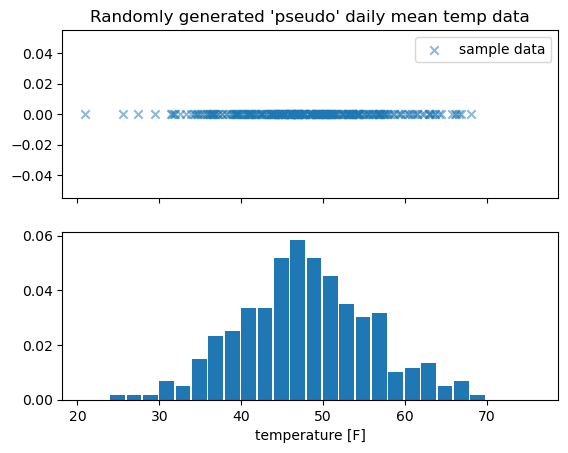

In [49]:
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].scatter(x,ypos,marker='x',label='sample data',alpha=0.5)
ax[0].legend()
ax[0].set_title("Randomly generated 'pseudo' daily mean temp data")
ax[1].hist(x,bins=np.arange(24,78,2),width=1.8,density=True)
ax[1].set_xlabel("temperature [F]")

fig.show()


# add normal distribution PDF
#temp_range=np.arange(24,78,0.1)
#pdf=norm.pdf(temp_range,loc=m,scale=1)

#ax[1].plot(temp_range,pdf,color='purple')